<a href="https://colab.research.google.com/github/Anish-000/Laptop-Price-Analysis/blob/main/Laptop_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [39]:
df = pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [40]:
print(df.isnull().sum())

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [41]:
print("✅ No missing values found in the dataset.")
df = df.dropna()
df.head()

✅ No missing values found in the dataset.


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [43]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [44]:
df_encoded = pd.get_dummies(df,
                            columns=['Product','Screen','CPU_model','GPU_model','Company', 'TypeName', 'OS',
                                     'Touchscreen', 'IPSpanel',
                                     'RetinaDisplay', 'CPU_company',
                                     'GPU_company', 'PrimaryStorageType',
                                     'SecondaryStorageType'],
                            drop_first=True)

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Columns: 875 entries, Inches to SecondaryStorageType_SSD
dtypes: bool(866), float64(4), int64(5)
memory usage: 1.1 MB


In [46]:
y = df_encoded['Price_euros']

X = df_encoded.drop('Price_euros', axis=1)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (1275, 874)
Shape of y (target): (1275,)


In [47]:
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1020, 874) (1020,)
Testing set shape: (255, 874) (255,)


In [48]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("✅ Model training completed")

✅ Model training completed


In [49]:
y_pred = lr_model.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Model Performance:
MAE : 458.57741788101777
MSE : 3935205.020225364
RMSE: 1983.7351184634917
R²  : -6.928457851827974


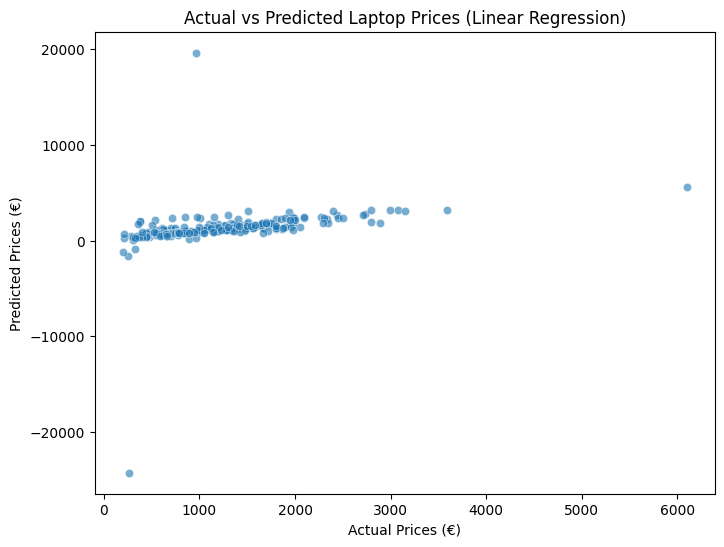

In [51]:
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Actual vs Predicted Laptop Prices (Linear Regression)")
plt.show()

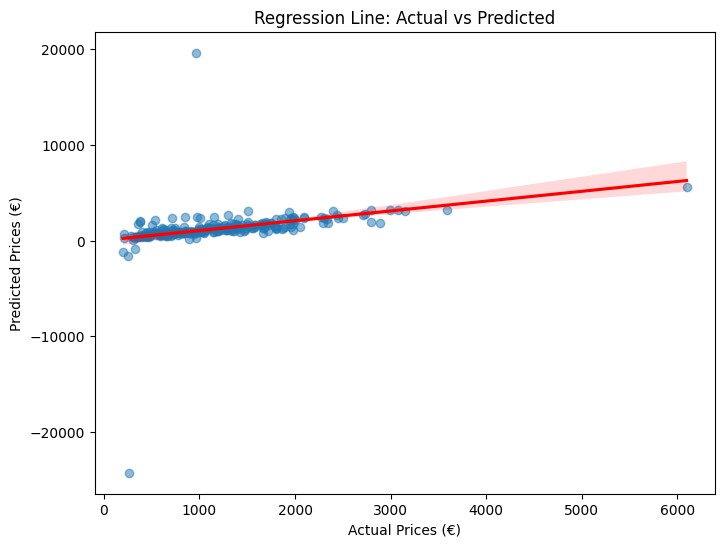

In [52]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Regression Line: Actual vs Predicted")
plt.show()

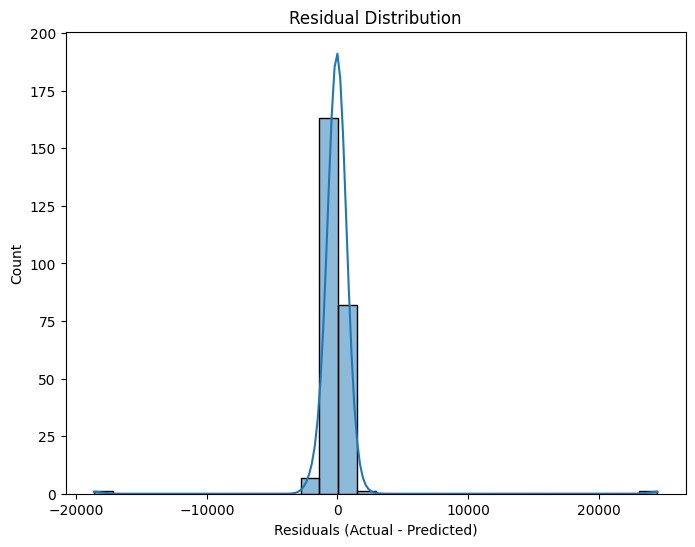

In [53]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution")
plt.show()

In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)   # Linear Regression
y_pred_rf = rf_model.predict(X_test)   # Random Forest

In [55]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R²  :", r2)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
MAE : 458.57741788101777
RMSE: 1983.7351184634917
R²  : -6.928457851827974

Random Forest Performance:
MAE : 174.4255022331155
RMSE: 260.03074124655325
R²  : 0.8637706306346875


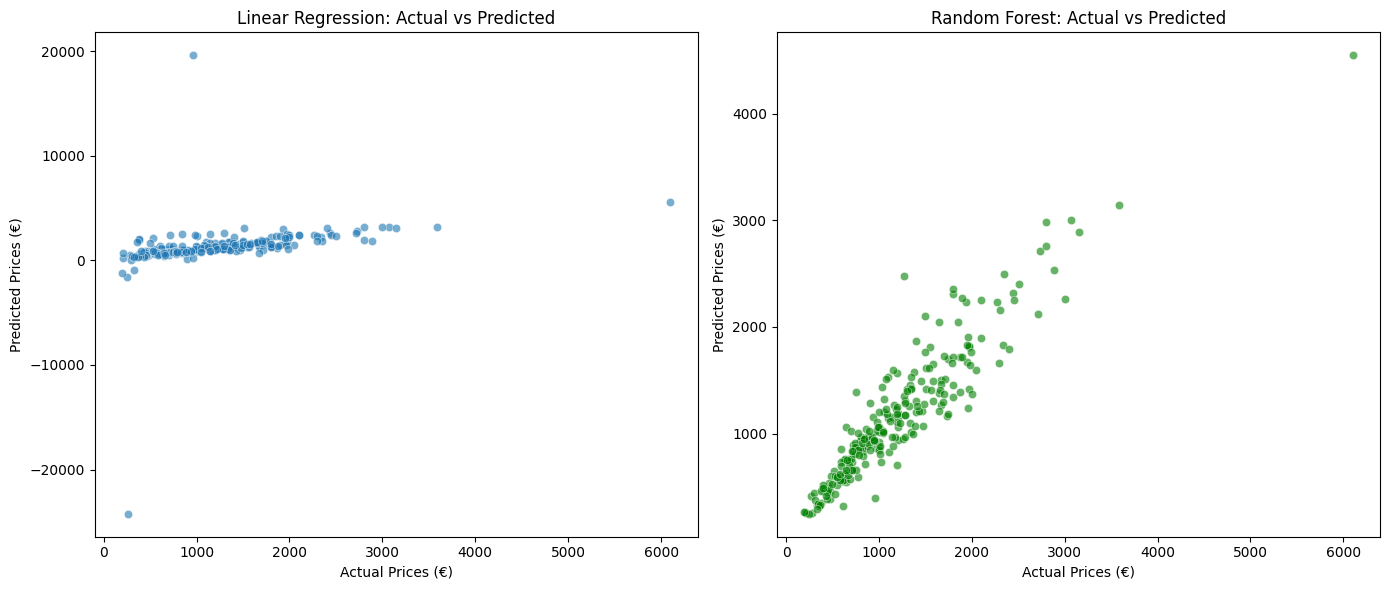

In [56]:
plt.figure(figsize=(14,6))

# Linear Regression
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Linear Regression: Actual vs Predicted")

# Random Forest
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="green")
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()

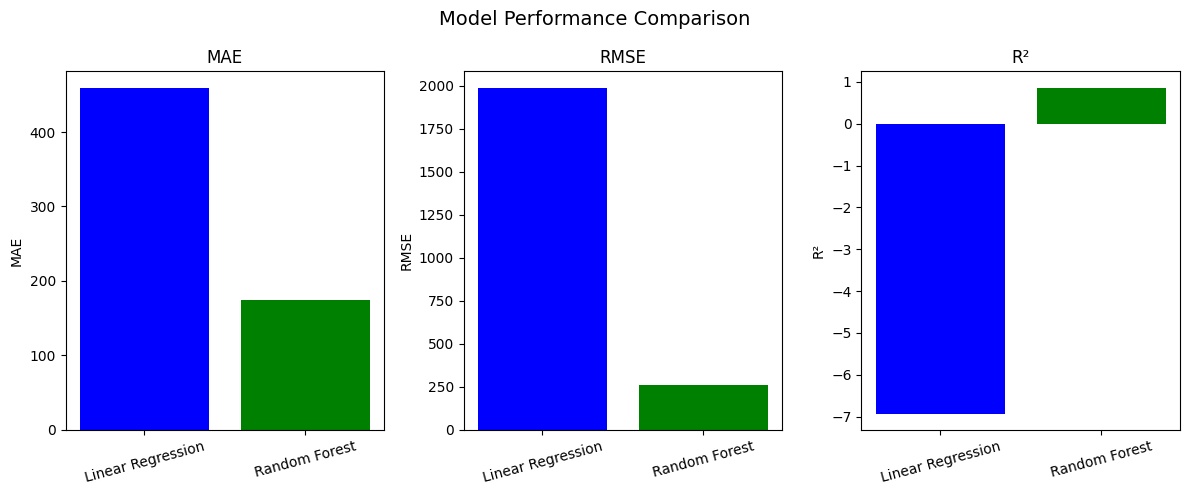

In [57]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

metrics = {
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
}

models = ["Linear Regression", "Random Forest"]

# Plot bar charts
plt.figure(figsize=(12,5))

for i, metric in enumerate(metrics.keys()):
    plt.subplot(1, 3, i+1)
    plt.bar(models, metrics[metric], color=["blue", "green"])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=15)

plt.suptitle("Model Performance Comparison", fontsize=14)
plt.tight_layout()
plt.show()